In [ ]:
#Content
# This dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.

# Acknowledgements
# The menu items and nutrition facts were scraped from the McDonald's website.

# Inspiration
# How many calories does the average McDonald's value meal contain? How much do beverages, like soda or coffee, contribute to the overall caloric intake? Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value? What about ordering egg whites instead of whole eggs? What is the least number of items could you order from the menu to meet one day's nutritional requirements?


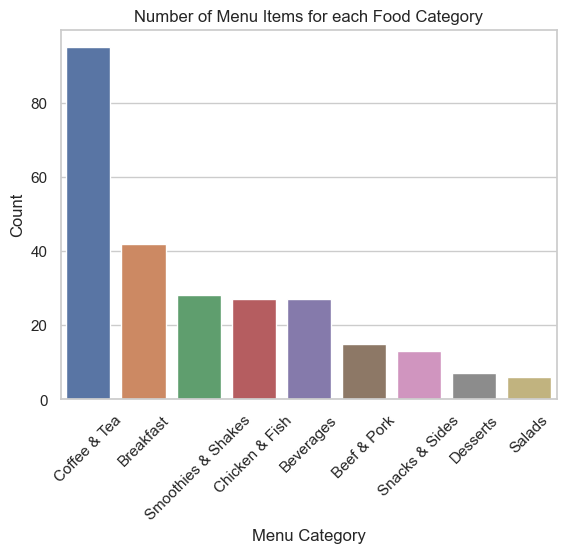

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px


df = pd.read_csv('menu.csv') 
df.head(10)

menu_category = df.Category.value_counts()
sns.barplot(x=menu_category.index, y=menu_category.values)
plt.title("Number of Menu Items for each Food Category")
plt.ylabel("Count")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [40]:
df.head(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

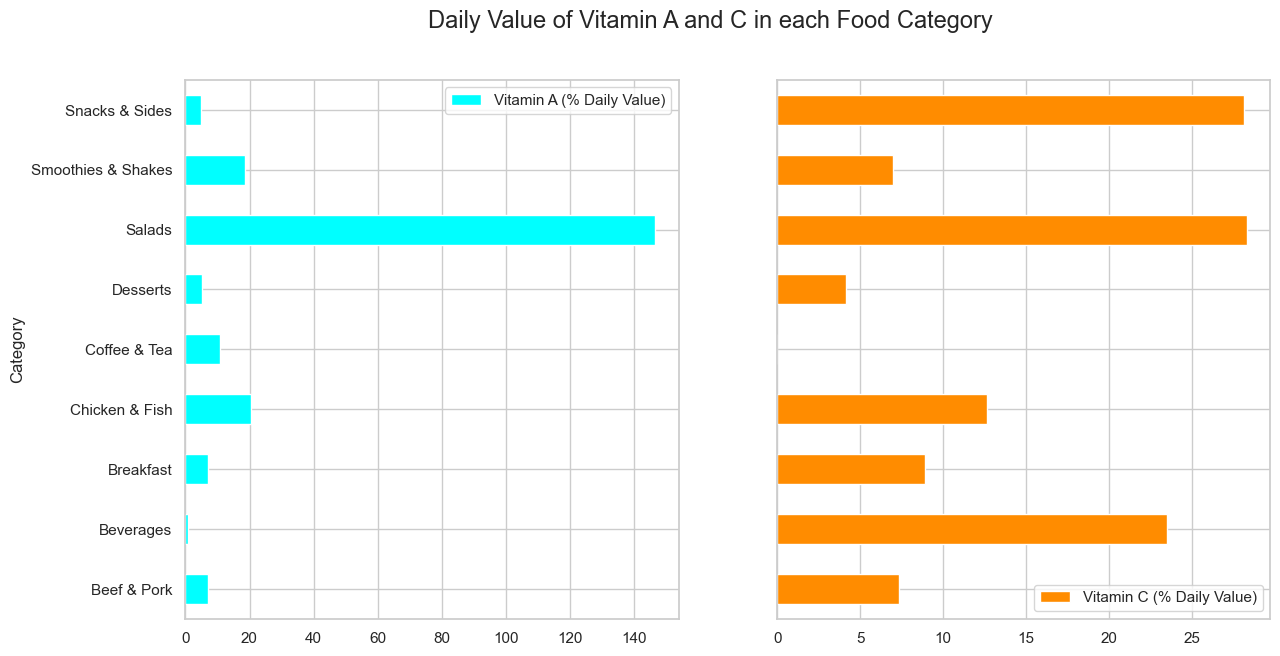

,Category,Vitamin A (% Daily Value),Vitamin C (% Daily Value)
0,Beef & Pork,6.933333,7.333333
1,Beverages,0.740741,23.481481
2,Breakfast,6.928571,8.904762
3,Chicken & Fish,20.444444,12.629630
4,Coffee & Tea,10.736842,0.000000
5,Desserts,5.142857,4.142857
6,Salads,146.666667,28.333333
7,Smoothies & Shakes,18.750000,6.964286
8,Snacks & Sides,4.846154,28.153846


In [42]:
vit_A_per_food = df.pivot_table('Vitamin A (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
vit_C_per_food = df.pivot_table('Vitamin C (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

vita = pd.merge(vit_A_per_food, vit_C_per_food)


n = 9
r = np.arange(n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
vita.plot(kind='barh', x='Category', y='Vitamin A (% Daily Value)', ax=ax1, color='aqua')
vita.plot(kind='barh', x='Category', y='Vitamin C (% Daily Value)', ax=ax2, color='darkorange')

plt.yticks(r, vita['Category'])
fig.suptitle('Daily Value of Vitamin A and C in each Food Category', fontsize=17)

plt.show()
vita

In [43]:
chol_per_food = df.pivot_table('Cholesterol (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
Na_per_food     = df.pivot_table('Sodium (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

cardio = pd.merge(chol_per_food, Na_per_food)
cardio

,Category,Cholesterol (% Daily Value),Sodium (% Daily Value)
0,Beef & Pork,28.933333,42.466667
1,Beverages,0.185185,1.740741
2,Breakfast,50.952381,50.500000
3,Chicken & Fish,25.222222,52.333333
4,Coffee & Tea,9.378947,5.726316
5,Desserts,4.857143,5.000000
6,Salads,17.333333,24.500000
7,Smoothies & Shakes,14.714286,7.785714
8,Snacks & Sides,6.230769,16.461538


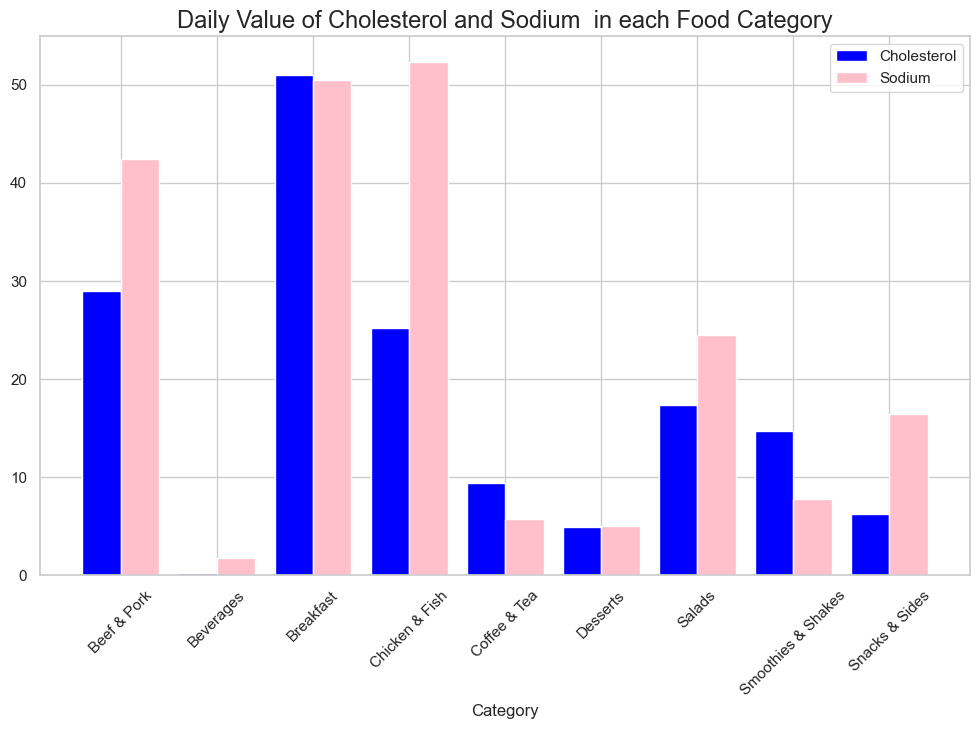

In [44]:
n=9
r = np.arange(n)
width = 0.20
plt.figure(figsize=(12,7))
plt.bar(r-width ,cardio["Cholesterol (% Daily Value)"],width=0.4, label = 'Cholesterol', color='blue')
plt.bar(r + width ,cardio["Sodium (% Daily Value)"],width=0.4, label = 'Sodium', color='pink')
plt.xticks(r, cardio['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Cholesterol and Sodium  in each Food Category', fontsize=17)
plt.show()

In [45]:
charb_per_food = df.pivot_table('Carbohydrates (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
fieb_per_food     = df.pivot_table('Dietary Fiber (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

charb = pd.merge(charb_per_food, fieb_per_food)
charb

,Category,Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value)
0,Beef & Pork,13.466667,9.866667
1,Beverages,9.592593,0.074074
2,Breakfast,16.571429,12.833333
3,Chicken & Fish,16.333333,11.814815
4,Coffee & Tea,14.863158,3.178947
5,Desserts,11.571429,3.428571
6,Salads,7.166667,18.500000
7,Smoothies & Shakes,30.142857,5.750000
8,Snacks & Sides,9.615385,7.076923


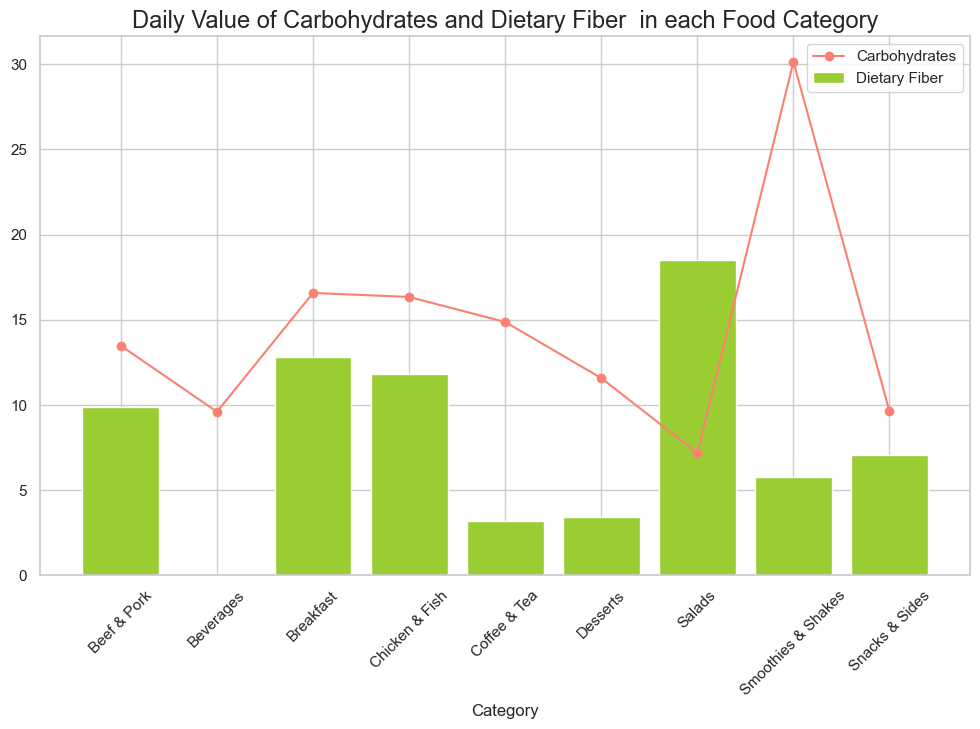

In [46]:
width = 0.20
plt.figure(figsize=(12,7))
plt.plot(r ,charb["Carbohydrates (% Daily Value)"], 'o-', label = 'Carbohydrates', color='salmon')
plt.bar(r  ,charb["Dietary Fiber (% Daily Value)"], label = 'Dietary Fiber', color='yellowgreen')
plt.xticks(r, charb['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Carbohydrates and Dietary Fiber  in each Food Category', fontsize=17)
plt.show()

Text(0.5, 0.98, 'Daily Value of Calcium and Iron in each Food Category')

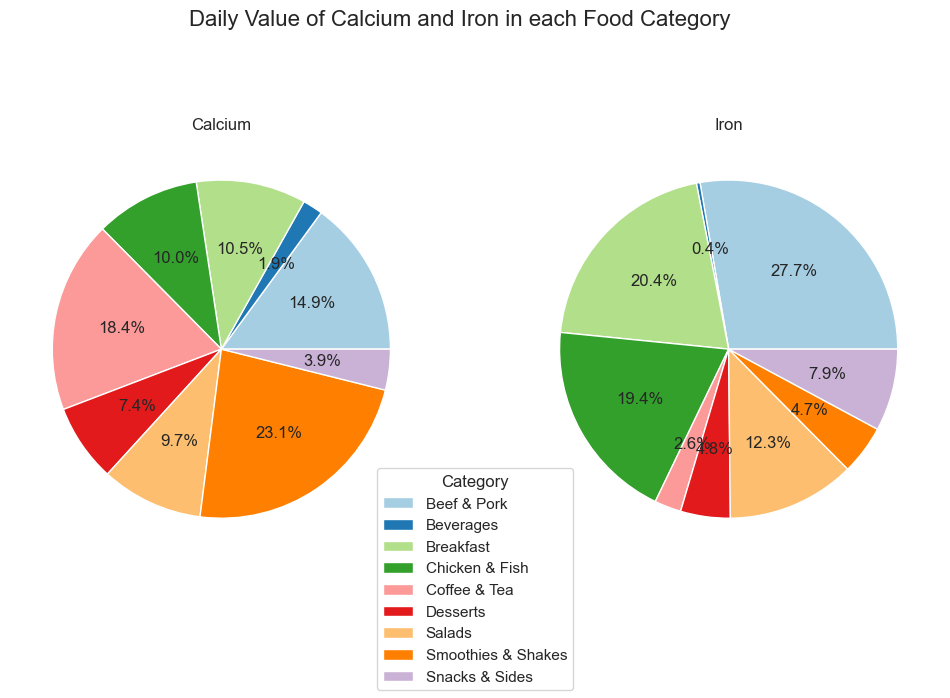

In [47]:
cal_per_food  = df.pivot_table('Calcium (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
iron_per_food = df.pivot_table('Iron (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

minerals = pd.merge(cal_per_food, iron_per_food)
minerals

fig, (ax1, ax2 )= plt.subplots(1, 2, figsize=(12,7))


ax1.pie(minerals["Calcium (% Daily Value)"], autopct='%1.1f%%',pctdistance=0.6, colors=sns.color_palette("Paired") )
ax1.set_title('Calcium')
ax2.pie(minerals["Iron (% Daily Value)"], autopct='%1.1f%%',pctdistance=0.6,colors=sns.color_palette("Paired") )
ax2.set_title('Iron')
# Adding legend
fig.legend(minerals['Category'],title ="Category",loc ="lower center",)
fig.suptitle('Daily Value of Calcium and Iron in each Food Category', fontsize=16)

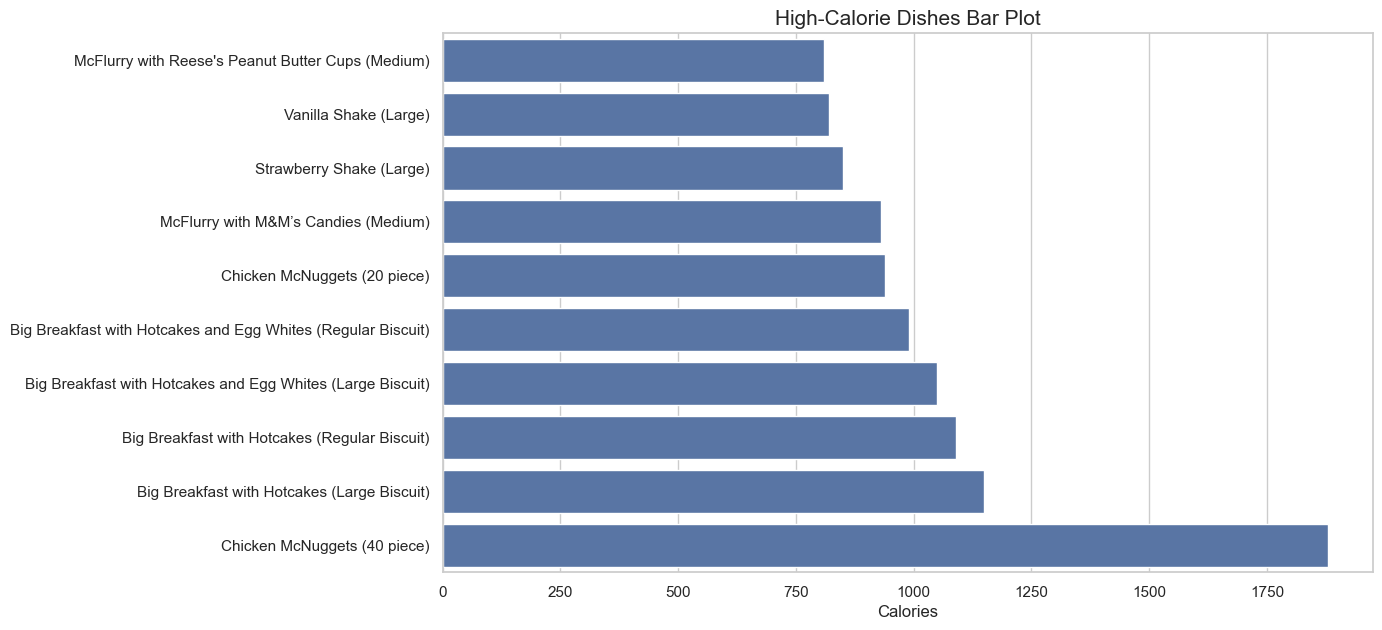

In [48]:
high_calories = df.groupby('Calories')['Item'].max().tail(10).reset_index()
high_calories
plt.figure(figsize=(12,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=high_calories, x='Calories', y='Item' , color='b')
plt.ylabel("")
plt.title("High-Calorie Dishes Bar Plot", fontsize=15)
plt.show()

<Figure size 1200x700 with 0 Axes>

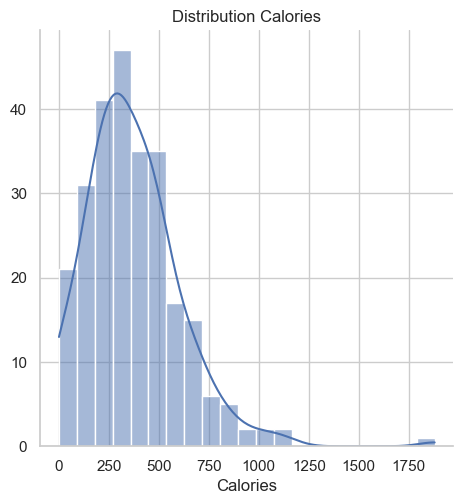

In [49]:
plt.figure(figsize=(12,7))
sns.displot(df["Calories"], kde=True) #KDE=Kernel density estimate curve
plt.ylabel('')
plt.title("Distribution Calories")
plt.show()

In [50]:
trace = go.Scatter(
    y = df['Cholesterol (% Daily Value)'].values,
    x = df['Item'].values,
    mode='markers',
    marker=dict(
        size= df['Cholesterol (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = df['Cholesterol (% Daily Value)'].values,
        colorscale='Portland',showscale=True
    ),
    text = df['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Cholesterol (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(title= 'Cholesterol (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [51]:

px.density_heatmap(x='Category',y='Item',data_frame=df,width=900, color_continuous_scale='Viridis')
